In [86]:
import pandas as pd

df = pd.read_csv('cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [87]:
df = df.loc[:, ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','texture_worst']]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,texture_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,17.33
1,M,20.57,17.77,132.90,1326.0,0.08474,23.41
2,M,19.69,21.25,130.00,1203.0,0.10960,25.53
3,M,11.42,20.38,77.58,386.1,0.14250,26.50
4,M,20.29,14.34,135.10,1297.0,0.10030,16.67
...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,26.40
565,M,20.13,28.25,131.20,1261.0,0.09780,38.25
566,M,16.60,28.08,108.30,858.1,0.08455,34.12
567,M,20.60,29.33,140.10,1265.0,0.11780,39.42


In [88]:
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=True)

### Recordar que: Los datos se deben guardar en un DataFrame y luego concatenarlo al nuevo

### Ventajas:

#### Estandarización : escala las características de modo que la distribución se centre alrededor de 0, con una desviación estándar de 1.
#### Normalización : reduce el rango de modo que el rango ahora esté entre 0 y 1 (o -1 a 1 si hay valores negativos).
#### Escalador robusto : similar a la normalización, pero en su lugar utiliza el rango intercuartil, por lo que es robusto para los valores atípicos.

### Desventajas:

#### Estandarización : no es bueno si los datos no se distribuyen normalmente (es decir, no hay distribución gaussiana).
#### Normalización : dejarse influenciar por valores atípicos (es decir, valores extremos).
#### Escalador robusto : no tiene en cuenta la mediana y solo se centra en las partes donde se encuentran los datos masivos.


### Recordar que si se tiene valores demasiado atipicos debemos primero eliminar estos por los metodos que ya vimos de feature ing.

In [89]:
### PARA LA COLUMNA radius_mean LA ESCALAREMOS CON UN RANGO 0-5
from sklearn.preprocessing import MinMaxScaler
ScalerM = MinMaxScaler(feature_range=(0,5))
escaladoM = ScalerM.fit_transform(df[['radius_mean']])

### Borramos los datos del DataFrame Original
df = df.drop(['radius_mean'], axis=1)

## Guardamos los nuevos datos en un DataFrame
dfM = pd.DataFrame(data=escaladoM, columns=['radius_mean'])

## Ahora concatenamos el DataFrame con los valores ya convertidos al DataFrame Original

df = pd.concat([df,dfM], axis=1)
df

,texture_mean,perimeter_mean,area_mean,smoothness_mean,texture_worst,diagnosis_M,radius_mean
0,10.38,122.80,1001.0,0.11840,17.33,1,2.605187
1,17.77,132.90,1326.0,0.08474,23.41,1,3.215722
2,21.25,130.00,1203.0,0.10960,25.53,1,3.007478
3,20.38,77.58,386.1,0.14250,26.50,1,1.050452
4,14.34,135.10,1297.0,0.10030,16.67,1,3.149463
...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.11100,26.40,1,3.449998
565,28.25,131.20,1261.0,0.09780,38.25,1,3.111600
566,28.08,108.30,858.1,0.08455,34.12,1,2.276255
567,29.33,140.10,1265.0,0.11780,39.42,1,3.222822


In [90]:
### PARA LA COLUMNA texture_mean la estandarizaremos 
from sklearn.preprocessing import StandardScaler
ScalerS = StandardScaler()
escaladoS = ScalerS.fit_transform(df[['texture_mean']])

#Borramos los datos originales del DataFrame
df = df.drop(['texture_mean'], axis=1)

#Guardamos los nuevos datos en un DataFrame para luego concatenarlos
dfS = pd.DataFrame(data=escaladoS, columns=['texture_mean'])

#Concatenamos con el DataFrame original 
df = pd.concat([df,dfS], axis=1)
df

,perimeter_mean,area_mean,smoothness_mean,texture_worst,diagnosis_M,radius_mean,texture_mean
0,122.80,1001.0,0.11840,17.33,1,2.605187,-2.073335
1,132.90,1326.0,0.08474,23.41,1,3.215722,-0.353632
2,130.00,1203.0,0.10960,25.53,1,3.007478,0.456187
3,77.58,386.1,0.14250,26.50,1,1.050452,0.253732
4,135.10,1297.0,0.10030,16.67,1,3.149463,-1.151816
...,...,...,...,...,...,...,...
564,142.00,1479.0,0.11100,26.40,1,3.449998,0.721473
565,131.20,1261.0,0.09780,38.25,1,3.111600,2.085134
566,108.30,858.1,0.08455,34.12,1,2.276255,2.045574
567,140.10,1265.0,0.11780,39.42,1,3.222822,2.336457


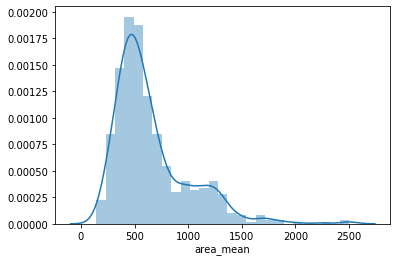

In [101]:
import seaborn as sns
sns.distplot(df['area_mean'])

In [103]:
from sklearn.preprocessing import PowerTransformer
scalerB = PowerTransformer(method='box-cox', standardize=True)
escaladoB = scalerB.fit_transform(df[['area_mean']])

#Borramos datos
df = df.drop(['area_mean'], axis=1)

#Guardamos en el DataFrame
dfB = pd.DataFrame(data=escaladoB, columns=['area_mean'])

#Concatenamos
df = pd.concat([df,dfB], axis=1)
df


,perimeter_mean,smoothness_mean,texture_worst,diagnosis_M,radius_mean,texture_mean,area_mean
0,122.80,0.11840,Normal,1,2.605187,-2.073335,1.126278
1,132.90,0.08474,Diferente,1,3.215722,-0.353632,1.633957
2,130.00,0.10960,Diferente,1,3.007478,0.456187,1.461583
3,77.58,0.14250,Diferente,1,1.050452,0.253732,-0.836085
4,135.10,0.10030,Normal,1,3.149463,-1.151816,1.595112
...,...,...,...,...,...,...,...
564,142.00,0.11100,Diferente,1,3.449998,0.721473,1.823147
565,131.20,0.09780,Extraño,1,3.111600,2.085134,1.545401
566,108.30,0.08455,Extraño,1,2.276255,2.045574,0.835111
567,140.10,0.11780,Extraño,1,3.222822,2.336457,1.551009


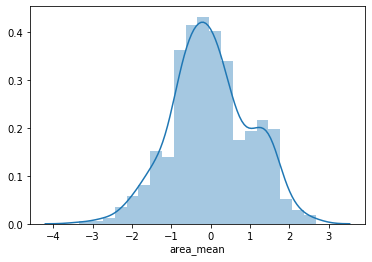

In [104]:
## GRAFICA DE LOS DATOS TRANSFORMADOS PARA QUE TUVIERA UNA MEJOR DISTRIBUCCION Y SE LE QUITARA EL SESGO

sns.distplot(df['area_mean'])